In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
print("🛍️ MALL CUSTOMER SEGMENTATION ANALYSIS")
print("="*50)

🛍️ MALL CUSTOMER SEGMENTATION ANALYSIS


In [ ]:
print("\n📊 STEP 1: DATA LOADING & INITIAL INSPECTION")
print("-" * 40)


📊 STEP 1: DATA LOADING & INITIAL INSPECTION
----------------------------------------


In [ ]:
import pandas as pd
df = pd.read_csv('/Mall_Customers.csv')

In [ ]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Shape: (200, 5)

Column Names:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
print("\n🔍 STEP 2: DATA QUALITY ASSESSMENT")
print("-" * 40)


🔍 STEP 2: DATA QUALITY ASSESSMENT
----------------------------------------


In [ ]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values per Column:
CustomerID: 200 unique values
Gender: 2 unique values
Age: 51 unique values
Annual Income (k$): 64 unique values
Spending Score (1-100): 84 unique values


In [ ]:
print("\nGender Distribution:")
print(df['Gender'].value_counts())


Gender Distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64


In [ ]:
print("\n📈 STEP 3: EXPLORATORY DATA ANALYSIS")
print("-" * 40)


📈 STEP 3: EXPLORATORY DATA ANALYSIS
----------------------------------------


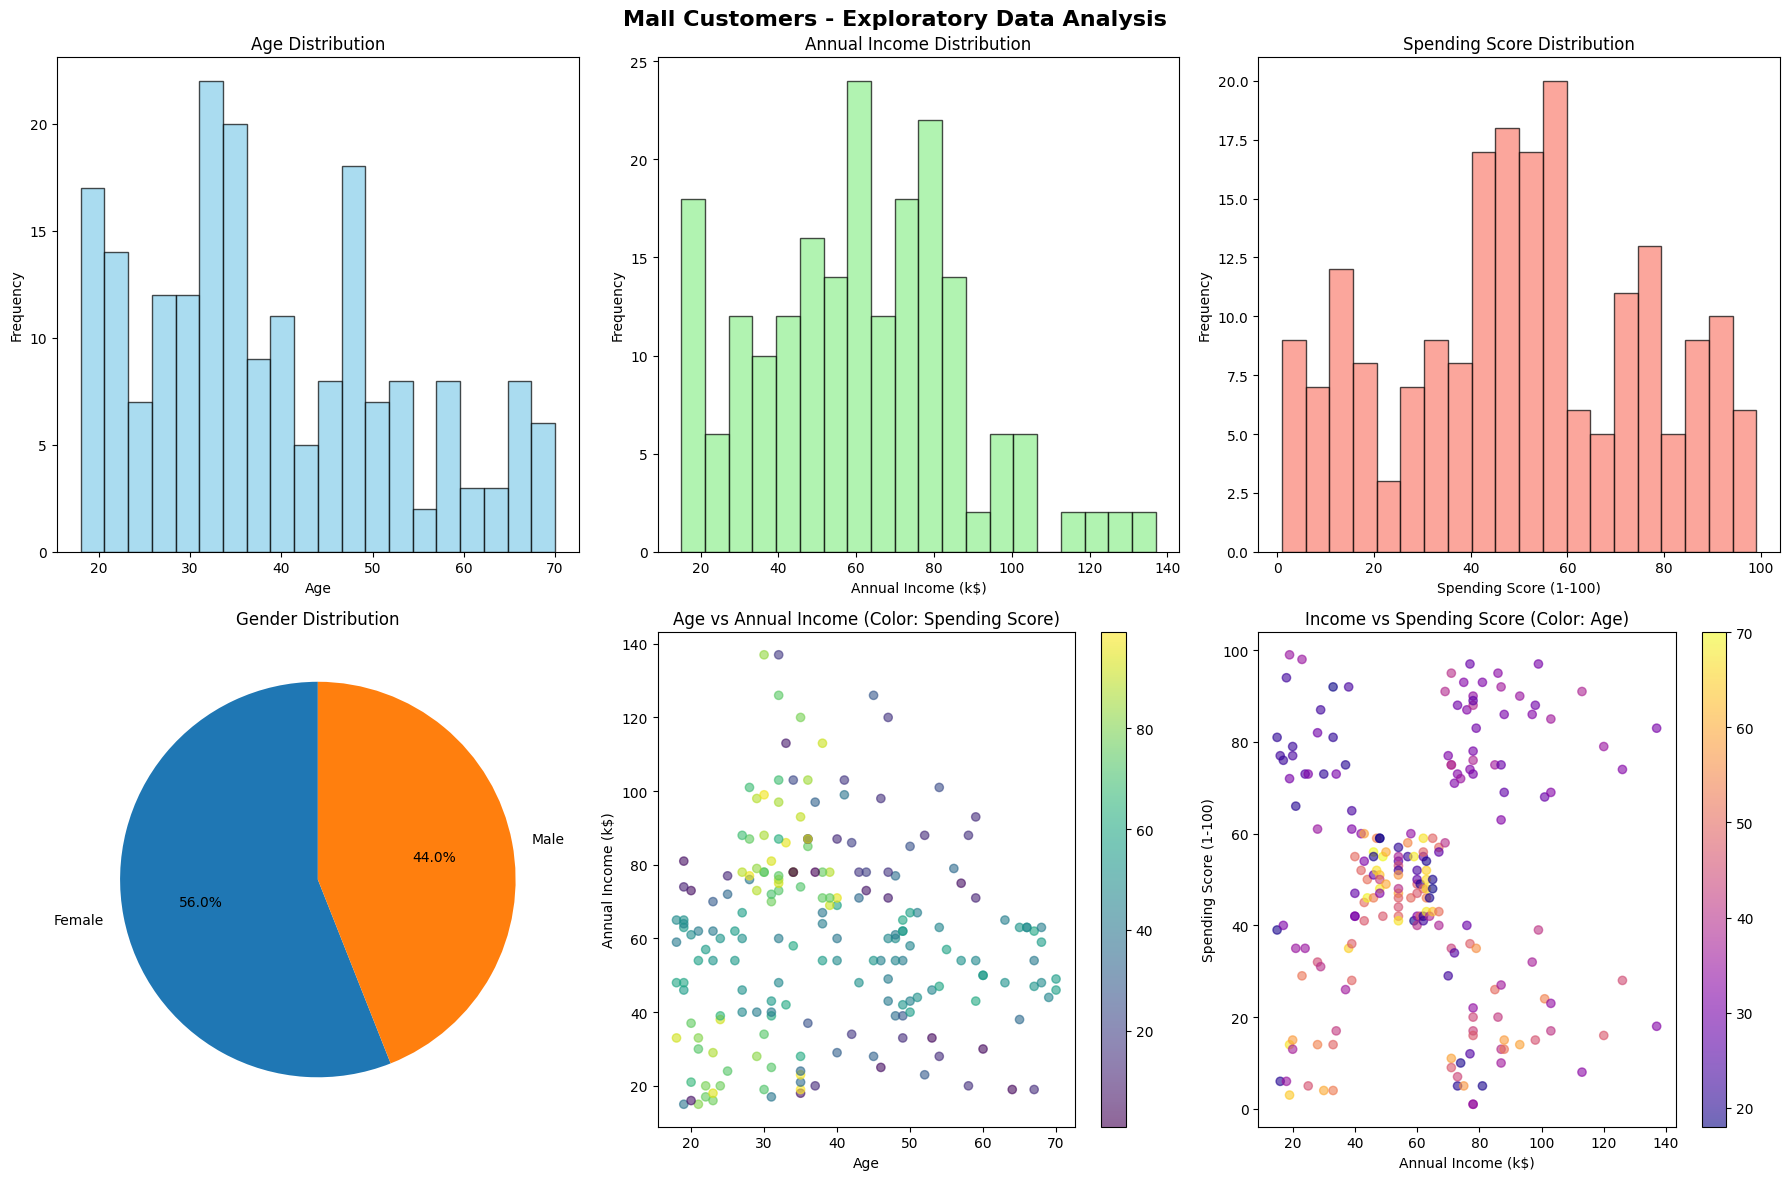

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Mall Customers - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Age Distribution
axes[0, 0].hist(df['Age'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# 2. Annual Income Distribution
axes[0, 1].hist(df['Annual Income (k$)'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Annual Income Distribution')
axes[0, 1].set_xlabel('Annual Income (k$)')
axes[0, 1].set_ylabel('Frequency')

# 3. Spending Score Distribution
axes[0, 2].hist(df['Spending Score (1-100)'], bins=20, color='salmon', alpha=0.7, edgecolor='black')
axes[0, 2].set_title('Spending Score Distribution')
axes[0, 2].set_xlabel('Spending Score (1-100)')
axes[0, 2].set_ylabel('Frequency')

# 4. Gender Distribution
gender_counts = df['Gender'].value_counts()
axes[1, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Gender Distribution')

# 5. Age vs Annual Income
scatter = axes[1, 1].scatter(df['Age'], df['Annual Income (k$)'],
                           c=df['Spending Score (1-100)'], cmap='viridis', alpha=0.6)
axes[1, 1].set_title('Age vs Annual Income (Color: Spending Score)')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Annual Income (k$)')
plt.colorbar(scatter, ax=axes[1, 1])

# 6. Annual Income vs Spending Score
scatter2 = axes[1, 2].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                            c=df['Age'], cmap='plasma', alpha=0.6)
axes[1, 2].set_title('Income vs Spending Score (Color: Age)')
axes[1, 2].set_xlabel('Annual Income (k$)')
axes[1, 2].set_ylabel('Spending Score (1-100)')
plt.colorbar(scatter2, ax=axes[1, 2])

plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis
print("\nCorrelation Matrix:")
# Convert categorical to numerical for correlation
df_numeric = df.copy()
df_numeric['Gender'] = df_numeric['Gender'].map({'Male': 1, 'Female': 0})
correlation_matrix = df_numeric.drop('CustomerID', axis=1).corr()
print(correlation_matrix)


Correlation Matrix:
                          Gender       Age  Annual Income (k$)  \
Gender                  1.000000  0.060867            0.056410   
Age                     0.060867  1.000000           -0.012398   
Annual Income (k$)      0.056410 -0.012398            1.000000   
Spending Score (1-100) -0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                               -0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


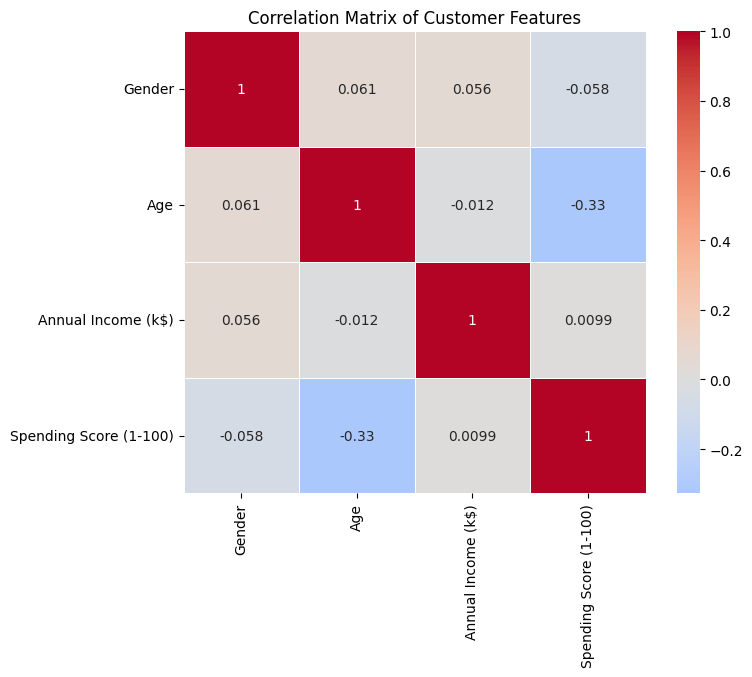

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Customer Features')
plt.show()

In [ ]:
print("\n🎯 STEP 4: CUSTOMER SEGMENTATION ANALYSIS")
print("-" * 40)


🎯 STEP 4: CUSTOMER SEGMENTATION ANALYSIS
----------------------------------------


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare data for clustering (using Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Find optimal number of clusters using Elbow Method
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

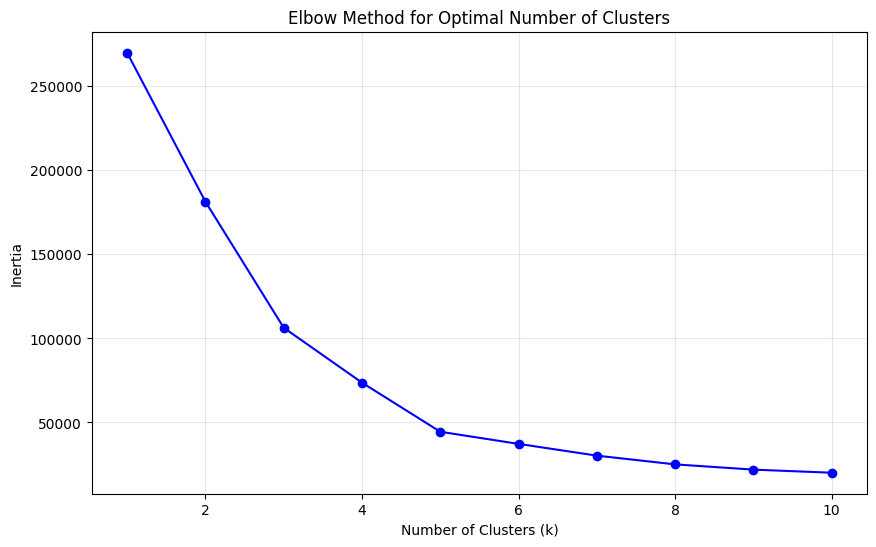

In [ ]:
# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Apply K-Means with optimal clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to dataframe
df['Cluster'] = cluster_labels

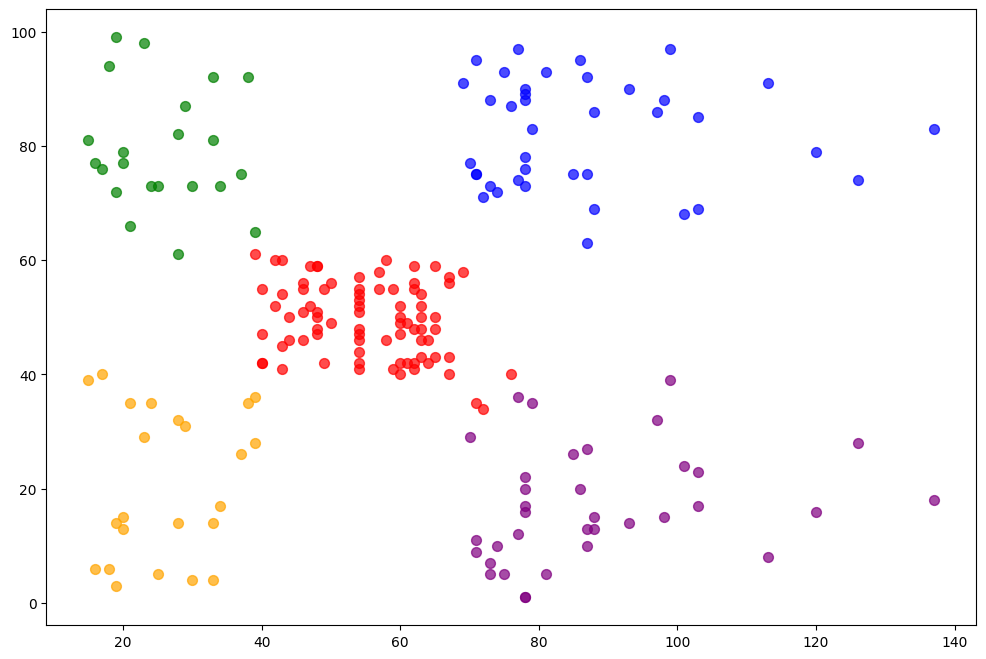

In [ ]:
# Visualize clusters
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(optimal_k):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1],
                c=colors[i], label=f'Cluster {i+1}', alpha=0.7, s=50)

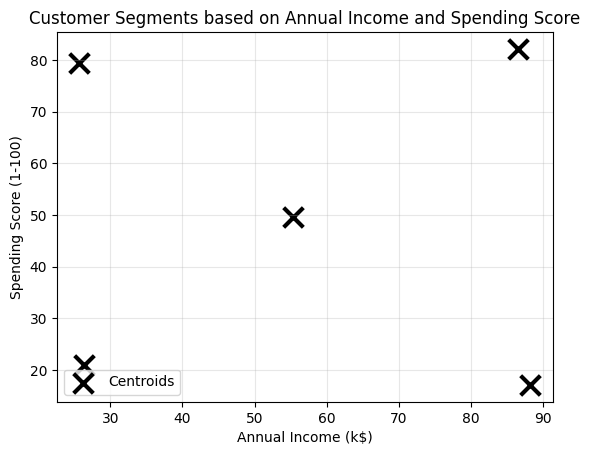

In [ ]:
# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x',
            s=200, linewidths=3, label='Centroids')

plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("\n📋 STEP 5: CLUSTER ANALYSIS & BUSINESS INSIGHTS")
print("-" * 40)


📋 STEP 5: CLUSTER ANALYSIS & BUSINESS INSIGHTS
----------------------------------------


In [ ]:
# Analyze each cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'Gender': lambda x: x.value_counts().index[0]  # Most common gender
}).round(2)

print("Cluster Summary Statistics:")
print(cluster_summary)

Cluster Summary Statistics:
           Age        Annual Income (k$)        Spending Score (1-100)         \
          mean    std               mean    std                   mean    std   
Cluster                                                                         
0        42.72  16.45              55.30   8.99                  49.52   6.53   
1        32.69   3.73              86.54  16.31                  82.13   9.36   
2        25.27   5.26              25.73   7.57                  79.36  10.50   
3        41.11  11.34              88.20  16.40                  17.11   9.95   
4        45.22  13.23              26.30   7.89                  20.91  13.02   

          Gender  
        <lambda>  
Cluster           
0         Female  
1         Female  
2         Female  
3           Male  
4         Female  


In [ ]:
# Count of customers in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print(f"\nCluster Sizes:")
for i in range(optimal_k):
    print(f"Cluster {i+1}: {cluster_counts[i]} customers ({cluster_counts[i]/len(df)*100:.1f}%)")


Cluster Sizes:
Cluster 1: 81 customers (40.5%)
Cluster 2: 39 customers (19.5%)
Cluster 3: 22 customers (11.0%)
Cluster 4: 35 customers (17.5%)
Cluster 5: 23 customers (11.5%)


In [ ]:
# Business Interpretation
cluster_interpretations = {
    0: "Careful Spenders - Low income, low spending",
    1: "Standard Customers - Average income, average spending",
    2: "Target Customers - High income, high spending",
    3: "Careless Customers - Low income, high spending",
    4: "Sensible Customers - High income, low spending"
}

In [ ]:
print(f"\n🎯 BUSINESS INSIGHTS & CLUSTER INTERPRETATION:")
print("-" * 40)
for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    avg_age = cluster_data['Age'].mean()

    print(f"\nCluster {cluster_id + 1}:")
    print(f"  • Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"  • Average Age: {avg_age:.1f} years")
    print(f"  • Average Income: ${avg_income:.1f}k")
    print(f"  • Average Spending Score: {avg_spending:.1f}/100")


🎯 BUSINESS INSIGHTS & CLUSTER INTERPRETATION:
----------------------------------------

Cluster 1:
  • Size: 81 customers (40.5%)
  • Average Age: 42.7 years
  • Average Income: $55.3k
  • Average Spending Score: 49.5/100

Cluster 2:
  • Size: 39 customers (19.5%)
  • Average Age: 32.7 years
  • Average Income: $86.5k
  • Average Spending Score: 82.1/100

Cluster 3:
  • Size: 22 customers (11.0%)
  • Average Age: 25.3 years
  • Average Income: $25.7k
  • Average Spending Score: 79.4/100

Cluster 4:
  • Size: 35 customers (17.5%)
  • Average Age: 41.1 years
  • Average Income: $88.2k
  • Average Spending Score: 17.1/100

Cluster 5:
  • Size: 23 customers (11.5%)
  • Average Age: 45.2 years
  • Average Income: $26.3k
  • Average Spending Score: 20.9/100


In [ ]:
# Business Interpretation
cluster_interpretations = {
    0: "Careful Spenders - Low income, low spending",
    1: "Standard Customers - Average income, average spending",
    2: "Target Customers - High income, high spending",
    3: "Careless Customers - Low income, high spending",
    4: "Sensible Customers - High income, low spending"
}

print(f"\n🎯 BUSINESS INSIGHTS & CLUSTER INTERPRETATION:")
print("-" * 40)
for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()
    avg_age = cluster_data['Age'].mean()

    print(f"\nCluster {cluster_id + 1}:")
    print(f"  • Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"  • Average Age: {avg_age:.1f} years")
    print(f"  • Average Income: ${avg_income:.1f}k")
    print(f"  • Average Spending Score: {avg_spending:.1f}/100")

    # Determine cluster characteristics
    if avg_income < 40 and avg_spending < 40:
        interpretation = "💡 Careful Spenders - Budget-conscious customers with limited income"
    elif avg_income > 70 and avg_spending > 70:
        interpretation = "🎯 VIP Customers - High-value customers, primary target for premium products"
    elif avg_income < 40 and avg_spending > 60:
        interpretation = "⚠️ Impulsive Spenders - Low income but high spending, potential credit risk"
    elif avg_income > 70 and avg_spending < 40:
        interpretation = "💰 Conservative High Earners - Wealthy but cautious spenders"
    else:
        interpretation = "📊 Standard Customers - Average income and spending patterns"

    print(f"  • Profile: {interpretation}")


🎯 BUSINESS INSIGHTS & CLUSTER INTERPRETATION:
----------------------------------------

Cluster 1:
  • Size: 81 customers (40.5%)
  • Average Age: 42.7 years
  • Average Income: $55.3k
  • Average Spending Score: 49.5/100
  • Profile: 📊 Standard Customers - Average income and spending patterns

Cluster 2:
  • Size: 39 customers (19.5%)
  • Average Age: 32.7 years
  • Average Income: $86.5k
  • Average Spending Score: 82.1/100
  • Profile: 🎯 VIP Customers - High-value customers, primary target for premium products

Cluster 3:
  • Size: 22 customers (11.0%)
  • Average Age: 25.3 years
  • Average Income: $25.7k
  • Average Spending Score: 79.4/100
  • Profile: ⚠️ Impulsive Spenders - Low income but high spending, potential credit risk

Cluster 4:
  • Size: 35 customers (17.5%)
  • Average Age: 41.1 years
  • Average Income: $88.2k
  • Average Spending Score: 17.1/100
  • Profile: 💰 Conservative High Earners - Wealthy but cautious spenders

Cluster 5:
  • Size: 23 customers (11.5%)
  • A

In [ ]:
print(f"\n📈 RECOMMENDED MARKETING STRATEGIES:")
print("-" * 40)
print("🎯 VIP Customers: Premium products, exclusive offers, loyalty programs")
print("💡 Careful Spenders: Budget-friendly options, value deals, discounts")
print("⚠️ Impulsive Spenders: Limited-time offers, installment plans")
print("💰 Conservative High Earners: Quality-focused marketing, investment products")
print("📊 Standard Customers: Balanced approach, seasonal promotions")


📈 RECOMMENDED MARKETING STRATEGIES:
----------------------------------------
🎯 VIP Customers: Premium products, exclusive offers, loyalty programs
💡 Careful Spenders: Budget-friendly options, value deals, discounts
⚠️ Impulsive Spenders: Limited-time offers, installment plans
💰 Conservative High Earners: Quality-focused marketing, investment products
📊 Standard Customers: Balanced approach, seasonal promotions


In [ ]:
print(f"\n📊 STEP 6: ADVANCED VISUALIZATIONS")
print("-" * 40)


📊 STEP 6: ADVANCED VISUALIZATIONS
----------------------------------------


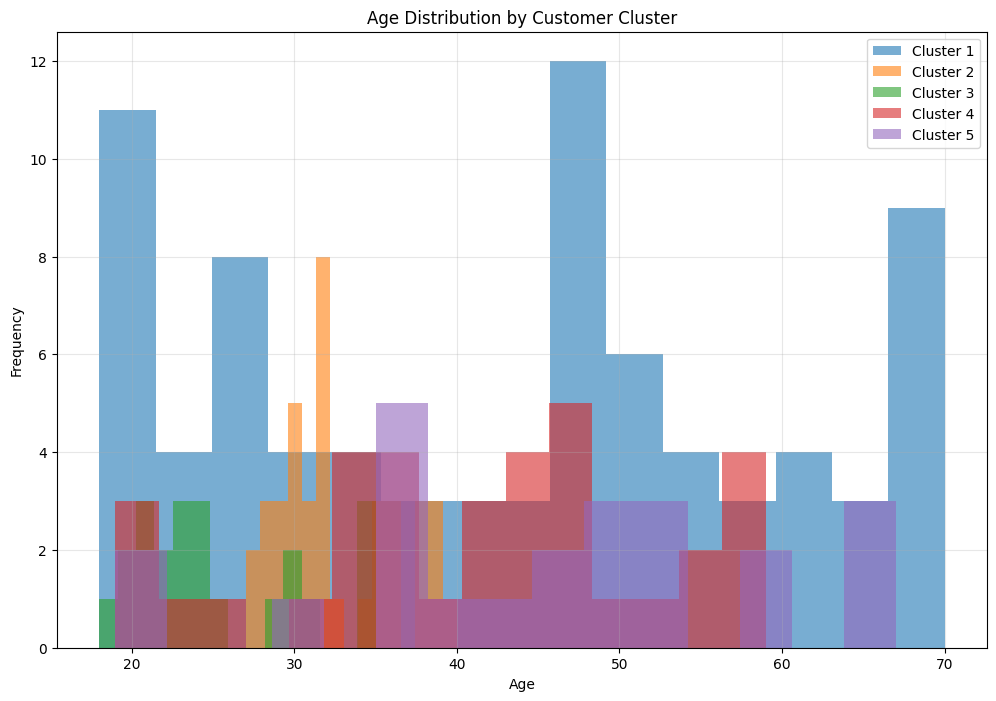

In [ ]:
# Age distribution by cluster
plt.figure(figsize=(12, 8))
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.hist(cluster_data['Age'], bins=15, alpha=0.6, label=f'Cluster {i+1}')
plt.title('Age Distribution by Customer Cluster')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

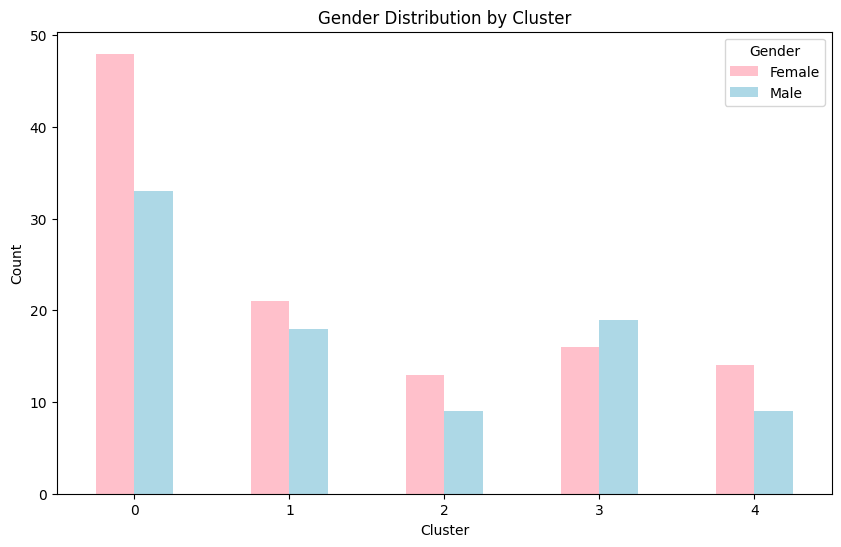

In [ ]:
# Gender distribution by cluster
gender_cluster = pd.crosstab(df['Cluster'], df['Gender'])
gender_cluster.plot(kind='bar', figsize=(10, 6), color=['pink', 'lightblue'])
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print("📊 PREPARING DATA FOR POWER BI DASHBOARD")
print("="*50)

📊 PREPARING DATA FOR POWER BI DASHBOARD


In [ ]:
cluster_names = {
    0: 'Careful Spenders',
    1: 'Standard Customers',
    2: 'VIP Customers',
    3: 'Impulsive Buyers',
    4: 'Conservative Wealthy'
}

In [ ]:
# Ensure 'Cluster' column exists in df before copying
if 'Cluster' not in df.columns:
  # Rerun the KMeans clustering and add the cluster labels to df
  from sklearn.cluster import KMeans
  X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
  optimal_k = 5 # Assuming 5 is the optimal number of clusters based on the elbow method
  kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
  df['Cluster'] = kmeans.fit_predict(X)


df_export = df.copy()
df_export['Cluster_Name'] = df_export['Cluster'].map(cluster_names)
df_export['Cluster_ID'] = df_export['Cluster'] + 1  # 1-5 instead of 0-4

In [ ]:
# Export main dataset
df_export.to_csv('Mall_Customers_with_Clusters.csv', index=False)
print("✅ Exported: Mall_Customers_with_Clusters.csv")

✅ Exported: Mall_Customers_with_Clusters.csv


In [ ]:
#  CLUSTER SUMMARY TABLE
cluster_summary = df.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std']
}).round(2)


In [ ]:
# Flatten column names
cluster_summary.columns = ['Customer_Count', 'Avg_Age', 'Age_StdDev',
                          'Avg_Income', 'Income_StdDev', 'Avg_Spending', 'Spending_StdDev']

In [ ]:
# Reset index and add cluster names
cluster_summary = cluster_summary.reset_index()
cluster_summary['Cluster_Name'] = cluster_summary['Cluster'].map(cluster_names)
cluster_summary['Cluster_ID'] = cluster_summary['Cluster'] + 1

In [ ]:
# Calculate percentages
cluster_summary['Customer_Percentage'] = (cluster_summary['Customer_Count'] / len(df) * 100).round(1)

In [ ]:
# Export cluster summary
cluster_summary.to_csv('Cluster_Summary.csv', index=False)
print("✅ Exported: Cluster_Summary.csv")

✅ Exported: Cluster_Summary.csv


In [ ]:
# 3. GENDER ANALYSIS BY CLUSTER
gender_cluster = pd.crosstab(df['Cluster'], df['Gender'])
gender_cluster['Total'] = gender_cluster.sum(axis=1)
gender_cluster['Male_Percentage'] = (gender_cluster['Male'] / gender_cluster['Total'] * 100).round(1)
gender_cluster['Female_Percentage'] = (gender_cluster['Female'] / gender_cluster['Total'] * 100).round(1)

In [ ]:
# Reset index and add cluster names
gender_cluster = gender_cluster.reset_index()
gender_cluster['Cluster_Name'] = gender_cluster['Cluster'].map(cluster_names)
gender_cluster['Cluster_ID'] = gender_cluster['Cluster'] + 1

In [ ]:
# Export gender analysis
gender_cluster.to_csv('Gender_by_Cluster.csv', index=False)
print("✅ Exported: Gender_by_Cluster.csv")

✅ Exported: Gender_by_Cluster.csv


In [ ]:
#AGE GROUPS ANALYSIS
# Create age groups for better visualization
def categorize_age(age):
    if age < 25:
        return 'Young (18-24)'
    elif age < 35:
        return 'Young Adult (25-34)'
    elif age < 45:
        return 'Middle-aged (35-44)'
    elif age < 55:
        return 'Mature (45-54)'
    else:
        return 'Senior (55+)'

df_export['Age_Group'] = df_export['Age'].apply(categorize_age)

In [ ]:
# Age group distribution by cluster
age_cluster = pd.crosstab(df_export['Cluster'], df_export['Age_Group'])
age_cluster = age_cluster.reset_index()
age_cluster['Cluster_Name'] = age_cluster['Cluster'].map(cluster_names)
age_cluster['Cluster_ID'] = age_cluster['Cluster'] + 1

In [ ]:
# Export age groups analysis
age_cluster.to_csv('Age_Groups_by_Cluster.csv', index=False)
print("✅ Exported: Age_Groups_by_Cluster.csv")

✅ Exported: Age_Groups_by_Cluster.csv


In [ ]:
# BUSINESS INSIGHTS TABLE
insights_data = {
    'Cluster_ID': [1, 2, 3, 4, 5],
    'Cluster_Name': ['Careful Spenders', 'Standard Customers', 'VIP Customers',
                     'Impulsive Buyers', 'Conservative Wealthy'],
    'Business_Profile': [
        'Budget-conscious customers with limited income',
        'Average customers with balanced income and spending',
        'High-value customers, primary target for premium products',
        'Low income but high spending, potential credit risk',
        'Wealthy but cautious spenders'
    ],
    'Marketing_Strategy': [
        'Budget-friendly options, value deals, discounts',
        'Balanced approach, seasonal promotions',
        'Premium products, exclusive offers, loyalty programs',
        'Limited-time offers, installment plans',
        'Quality-focused marketing, investment products'
    ],
    'Revenue_Potential': ['Low', 'Medium', 'High', 'Medium', 'High'],
    'Risk_Level': ['Low', 'Low', 'Low', 'High', 'Low']
}

business_insights = pd.DataFrame(insights_data)
business_insights.to_csv('Business_Insights.csv', index=False)
print("✅ Exported: Business_Insights.csv")

✅ Exported: Business_Insights.csv


In [ ]:
# 6. UPDATE MAIN DATASET WITH AGE GROUPS
df_export.to_csv('Mall_Customers_Complete.csv', index=False)
print("✅ Exported: Mall_Customers_Complete.csv (includes Age_Group)")

✅ Exported: Mall_Customers_Complete.csv (includes Age_Group)


In [ ]:
print(f"\n🎯 DATA EXPORT COMPLETE!")
print(f"Files created for Power BI:")
print(f"1. Mall_Customers_Complete.csv - Main dataset with all features")
print(f"2. Cluster_Summary.csv - Key statistics by cluster")
print(f"3. Gender_by_Cluster.csv - Gender distribution analysis")
print(f"4. Age_Groups_by_Cluster.csv - Age group analysis")
print(f"5. Business_Insights.csv - Strategic recommendations")


🎯 DATA EXPORT COMPLETE!
Files created for Power BI:
1. Mall_Customers_Complete.csv - Main dataset with all features
2. Cluster_Summary.csv - Key statistics by cluster
3. Gender_by_Cluster.csv - Gender distribution analysis
4. Age_Groups_by_Cluster.csv - Age group analysis
5. Business_Insights.csv - Strategic recommendations


In [ ]:
# Display preview of key data
print(f"\n📊 PREVIEW OF KEY DATA:")
print(f"\nCluster Summary:")
print(cluster_summary[['Cluster_ID', 'Cluster_Name', 'Customer_Count', 'Customer_Percentage',
                      'Avg_Age', 'Avg_Income', 'Avg_Spending']].head())

print(f"\nBusiness Insights:")
print(business_insights[['Cluster_Name', 'Business_Profile', 'Revenue_Potential']].head())


📊 PREVIEW OF KEY DATA:

Cluster Summary:
   Cluster_ID          Cluster_Name  Customer_Count  Customer_Percentage  \
0           1      Careful Spenders              81                 40.5   
1           2    Standard Customers              39                 19.5   
2           3         VIP Customers              22                 11.0   
3           4      Impulsive Buyers              35                 17.5   
4           5  Conservative Wealthy              23                 11.5   

   Avg_Age  Avg_Income  Avg_Spending  
0    42.72       55.30         49.52  
1    32.69       86.54         82.13  
2    25.27       25.73         79.36  
3    41.11       88.20         17.11  
4    45.22       26.30         20.91  

Business Insights:
           Cluster_Name                                   Business_Profile  \
0      Careful Spenders     Budget-conscious customers with limited income   
1    Standard Customers  Average customers with balanced income and spe...   
2         VIP